# Gene Distances

In [1]:
import numpy as np
import pandas as pd
import re

data = pd.read_csv('KSV_gex.csv', index_col=0)
data = data.T
data.to_csv('KSV_gex_transposed.csv')

def extract_location(gene_name):
    match = re.search(r'_(\d+(?:\.\d+)?)P', gene_name)
    if match:
        return float(match.group(1))
    else:
        return None

gene_locations = data.index.to_series().apply(extract_location)
locations = gene_locations.values


In [2]:
distance_matrix = np.abs(np.subtract.outer(locations, locations))
distance_df = pd.DataFrame(distance_matrix, index=gene_locations.index, columns=gene_locations.index)
distance_df

,K1_133PP1.TRUE,K1_348PP1.TRUE,K1_622PP1.TRUE,K3_18883PP1.TRUE,K3_19081PP1.TRUE,K3_19577PP1.TRUE,Orf70_20979PP1.TRUE,K4_21778PP1.TRUE,K4_21778.5PP1.TRUE,K4_21780PP1.TRUE,...,K14_129773PP2.TRUE,K14_129773.5PP2.TRUE,K14_129945PP2.TRUE,K14_130126PP2.TRUE,K15_130749PP2.TRUE,K15_131117PP2.TRUE,K15_131117.5PP2.TRUE,K15_131458PP2.TRUE,K15_136250.5PP2.TRUE,K2_17821PP1.TRUE
K1_133PP1.TRUE,0.0,215.0,489.0,18750.0,18948.0,19444.0,20846.0,21645.0,21645.5,21647.0,...,129640.0,129640.5,129812.0,129993.0,130616.0,130984.0,130984.5,131325.0,136117.5,17688.0
K1_348PP1.TRUE,215.0,0.0,274.0,18535.0,18733.0,19229.0,20631.0,21430.0,21430.5,21432.0,...,129425.0,129425.5,129597.0,129778.0,130401.0,130769.0,130769.5,131110.0,135902.5,17473.0
K1_622PP1.TRUE,489.0,274.0,0.0,18261.0,18459.0,18955.0,20357.0,21156.0,21156.5,21158.0,...,129151.0,129151.5,129323.0,129504.0,130127.0,130495.0,130495.5,130836.0,135628.5,17199.0
K3_18883PP1.TRUE,18750.0,18535.0,18261.0,0.0,198.0,694.0,2096.0,2895.0,2895.5,2897.0,...,110890.0,110890.5,111062.0,111243.0,111866.0,112234.0,112234.5,112575.0,117367.5,1062.0
K3_19081PP1.TRUE,18948.0,18733.0,18459.0,198.0,0.0,496.0,1898.0,2697.0,2697.5,2699.0,...,110692.0,110692.5,110864.0,111045.0,111668.0,112036.0,112036.5,112377.0,117169.5,1260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K15_131117PP2.TRUE,130984.0,130769.0,130495.0,112234.0,112036.0,111540.0,110138.0,109339.0,109338.5,109337.0,...,1344.0,1343.5,1172.0,991.0,368.0,0.0,0.5,341.0,5133.5,113296.0
K15_131117.5PP2.TRUE,130984.5,130769.5,130495.5,112234.5,112036.5,111540.5,110138.5,109339.5,109339.0,109337.5,...,1344.5,1344.0,1172.5,991.5,368.5,0.5,0.0,340.5,5133.0,113296.5
K15_131458PP2.TRUE,131325.0,131110.0,130836.0,112575.0,112377.0,111881.0,110479.0,109680.0,109679.5,109678.0,...,1685.0,1684.5,1513.0,1332.0,709.0,341.0,340.5,0.0,4792.5,113637.0
K15_136250.5PP2.TRUE,136117.5,135902.5,135628.5,117367.5,117169.5,116673.5,115271.5,114472.5,114472.0,114470.5,...,6477.5,6477.0,6305.5,6124.5,5501.5,5133.5,5133.0,4792.5,0.0,118429.5


In [3]:
lower_tri_indices = np.tril_indices(distance_matrix.shape[0], k=-1)
distance_df_lower_tri = distance_df.values[lower_tri_indices]
distance_df_lower_tri = pd.Series(distance_df_lower_tri)

## Pooling by gene (Distance)

In [4]:
# Extract the gene name from the primer name
gene_names = gene_locations.index.to_series().apply(lambda x: x.split('_')[0])

# Group by gene name and calculate the mean location
average_locations = gene_locations.groupby(gene_names).mean()
average_locations_values = average_locations.values

average_distance_matrix = np.abs(np.subtract.outer(average_locations_values, average_locations_values))
average_distance_df = pd.DataFrame(average_distance_matrix, index=average_locations.index, columns=average_locations.index)
average_distance_df


,K1,K14,K15,K2,K3,K4,K5,K7,LANA,Orf10,...,Orf67,Orf68,Orf69,Orf7,Orf70,Orf8,Orf9,vIRF1,vIRF2,vIRF4
K1,0.000000,128745.833333,131770.733333,17453.333333,18812.666667,21411.166667,25804.833333,28291.333333,123014.183333,14812.333333,...,113612.583333,115541.750000,116653.333333,7928.000000,20611.333333,10110.333333,13429.333333,83968.208333,92249.583333,86355.583333
K14,128745.833333,0.000000,3024.900000,111292.500000,109933.166667,107334.666667,102941.000000,100454.500000,5731.650000,113933.500000,...,15133.250000,13204.083333,12092.500000,120817.833333,108134.500000,118635.500000,115316.500000,44777.625000,36496.250000,42390.250000
K15,131770.733333,3024.900000,0.000000,114317.400000,112958.066667,110359.566667,105965.900000,103479.400000,8756.550000,116958.400000,...,18158.150000,16228.983333,15117.400000,123842.733333,111159.400000,121660.400000,118341.400000,47802.525000,39521.150000,45415.150000
K2,17453.333333,111292.500000,114317.400000,0.000000,1359.333333,3957.833333,8351.500000,10838.000000,105560.850000,2641.000000,...,96159.250000,98088.416667,99200.000000,9525.333333,3158.000000,7343.000000,4024.000000,66514.875000,74796.250000,68902.250000
K3,18812.666667,109933.166667,112958.066667,1359.333333,0.000000,2598.500000,6992.166667,9478.666667,104201.516667,4000.333333,...,94799.916667,96729.083333,97840.666667,10884.666667,1798.666667,8702.333333,5383.333333,65155.541667,73436.916667,67542.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Orf8,10110.333333,118635.500000,121660.400000,7343.000000,8702.333333,11300.833333,15694.500000,18181.000000,112903.850000,4702.000000,...,103502.250000,105431.416667,106543.000000,2182.333333,10501.000000,0.000000,3319.000000,73857.875000,82139.250000,76245.250000
Orf9,13429.333333,115316.500000,118341.400000,4024.000000,5383.333333,7981.833333,12375.500000,14862.000000,109584.850000,1383.000000,...,100183.250000,102112.416667,103224.000000,5501.333333,7182.000000,3319.000000,0.000000,70538.875000,78820.250000,72926.250000
vIRF1,83968.208333,44777.625000,47802.525000,66514.875000,65155.541667,62557.041667,58163.375000,55676.875000,39045.975000,69155.875000,...,29644.375000,31573.541667,32685.125000,76040.208333,63356.875000,73857.875000,70538.875000,0.000000,8281.375000,2387.375000
vIRF2,92249.583333,36496.250000,39521.150000,74796.250000,73436.916667,70838.416667,66444.750000,63958.250000,30764.600000,77437.250000,...,21363.000000,23292.166667,24403.750000,84321.583333,71638.250000,82139.250000,78820.250000,8281.375000,0.000000,5894.000000


## Pooling by gene (Correlation)

In [5]:
average_expression = data.groupby(gene_names).mean()
correlation_matrix = average_expression.T.corr(method='pearson')
correlation_matrix


,K1,K14,K15,K2,K3,K4,K5,K7,LANA,Orf10,...,Orf67,Orf68,Orf69,Orf7,Orf70,Orf8,Orf9,vIRF1,vIRF2,vIRF4
K1,1.000000,0.431397,0.089735,0.271017,0.184781,0.290918,0.373761,0.313811,0.340167,0.370072,...,0.248528,-0.018085,0.251307,0.396904,0.238422,0.398816,0.470258,0.229243,0.211747,0.223686
K14,0.431397,1.000000,0.557989,0.594787,0.520712,0.507301,0.443679,0.609572,0.769794,0.611961,...,0.627707,0.360511,0.715968,0.634914,0.455124,0.626742,0.599966,0.751996,0.528935,0.687882
K15,0.089735,0.557989,1.000000,0.398219,0.144964,0.112921,0.009892,0.338204,0.740032,0.333666,...,0.432647,0.715067,0.829518,0.359940,0.156643,0.313608,0.208144,0.639593,0.472855,0.527738
K2,0.271017,0.594787,0.398219,1.000000,0.580200,0.634742,0.613633,0.771647,0.717503,0.840891,...,0.667291,0.190407,0.708208,0.708406,0.594477,0.841821,0.738512,0.591926,0.367530,0.741872
K3,0.184781,0.520712,0.144964,0.580200,1.000000,0.837607,0.593356,0.657184,0.413023,0.684201,...,0.596828,-0.019912,0.375666,0.492431,0.833162,0.545447,0.633381,0.508109,0.293566,0.655102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Orf8,0.398816,0.626742,0.313608,0.841821,0.545447,0.602038,0.574024,0.711349,0.626339,0.850759,...,0.712416,0.136123,0.636263,0.767337,0.472981,1.000000,0.871275,0.586737,0.287060,0.765628
Orf9,0.470258,0.599966,0.208144,0.738512,0.633381,0.650009,0.624743,0.750595,0.559953,0.835250,...,0.710768,0.027649,0.561446,0.775450,0.577688,0.871275,1.000000,0.483436,0.202731,0.750208
vIRF1,0.229243,0.751996,0.639593,0.591926,0.508109,0.479244,0.257162,0.497789,0.697491,0.574568,...,0.741132,0.568322,0.755250,0.582306,0.395890,0.586737,0.483436,1.000000,0.661492,0.852661
vIRF2,0.211747,0.528935,0.472855,0.367530,0.293566,0.353589,0.068140,0.335008,0.487966,0.307617,...,0.291429,0.584525,0.476167,0.408721,0.285215,0.287060,0.202731,0.661492,1.000000,0.453974


In [10]:
ave_D_lower_tri = np.tril_indices(average_distance_matrix.shape[0], k=-1)
ave_D_lower_tri = average_distance_df.values[ave_D_lower_tri]
#ave_D_lower_tri = pd.Series(ave_D_lower_tri)

ave_R_lower_tri = np.tril_indices(correlation_matrix.shape[0], k=-1)
ave_R_lower_tri = correlation_matrix.values[ave_R_lower_tri]
#ave_R_lower_tri = pd.Series(ave_R_lower_tri)

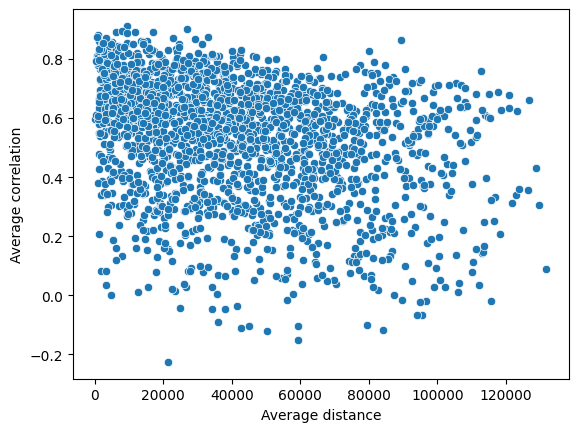

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=ave_D_lower_tri, y=ave_R_lower_tri)
plt.xlabel('Average distance')
plt.ylabel('Average correlation')
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(ave_D_lower_tri.reshape(-1, 1), ave_R_lower_tri)

print(mean_squared_error(ave_R_lower_tri, model.predict(ave_D_lower_tri.reshape(-1, 1))))
print(r2_score(ave_R_lower_tri, model.predict(ave_D_lower_tri.reshape(-1, 1))))


0.035948627905939605
0.09088599421905119


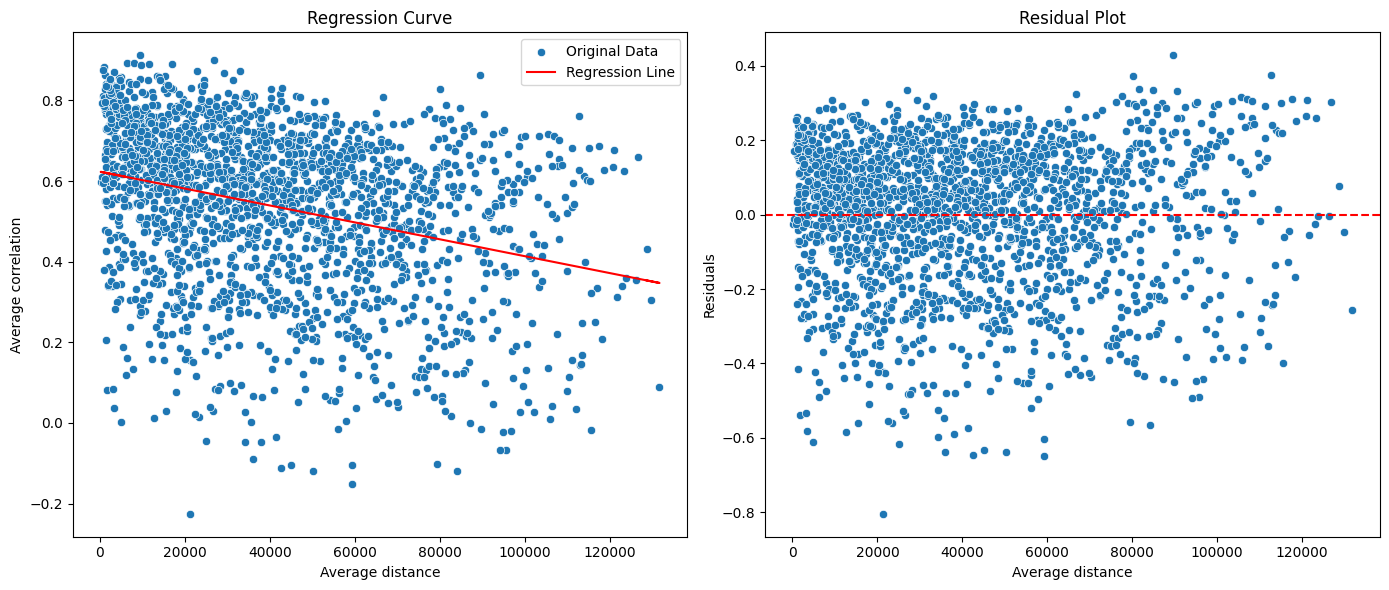

In [17]:
# Plot the regression curve over the original data
plt.figure(figsize=(14, 6))

# Scatter plot of the original data
plt.subplot(1, 2, 1)
sns.scatterplot(x=ave_D_lower_tri, y=ave_R_lower_tri, label='Original Data')
plt.plot(ave_D_lower_tri, model.predict(ave_D_lower_tri.reshape(-1, 1)), color='red', label='Regression Line')
plt.xlabel('Average distance')
plt.ylabel('Average correlation')
plt.legend()
plt.title('Regression Curve')

# Residual plot
plt.subplot(1, 2, 2)
residuals = ave_R_lower_tri - model.predict(ave_D_lower_tri.reshape(-1, 1))
sns.scatterplot(x=ave_D_lower_tri, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Average distance')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [ ]:
correlation_coefficient = np.corrcoef(ave_D_lower_tri, ave_R_lower_tri)[0, 1]
print(correlation_coefficient)

-0.30147304061731806
